## County Level Analysis - Maternal Healthcare Deserts and Political Affiliation

### About this Notebook
This notebook first works with the OB-GYN provider rate dataset to determine the maternal healthcare landscape across US counties. The goal of this notebook is to determine the landscape of care with regards to political affiliation. In order to do this, an MIT Election dataset was added and incorporated into the analysys.

The following data comes from the [U.S. Health Resources and Services Administration (HRSA), Area Health Resources Files (AHRF)](https://data.hrsa.gov/topics/health-workforce/ahrf). The U.S. Health Resources and Services Administration (HRSA) serves as a reputable and reliable source of healthcare-related data in the United States. The Area Health Resources Files (AHRF), a product of HRSA, collates data useful for assessing healthcare accessibility and resources across different regions. 


### Setup
The following code cells set up the analysis of county level data, carrying out basic functions such as examining the shape, columns, and standardizing the format to remove any unnecessary spaces/capital letters. 

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
obgyn_df=pd.read_csv('../data/raw/OB-GYN Provider Rate (per 100,0-Table 1.csv')

In [4]:
obgyn_df.shape

(3270, 8)

In [5]:
obgyn_df.columns

Index(['ID', 'County FIPS Code', 'HRSA Region', 'State', 'County',
       'OB-GYN Provider Rate (per 100,000)', 'NCHS Urban-Rural Classification',
       'NCHS Urban-Rural Code'],
      dtype='object')

* Rename Columns to remove spaces/capital letters to make data easier to use

In [6]:
col_rename_dict = {
 'County FIPS Code': 'county_fips_code', 
 'HRSA Region': 'HRSA_region', 
 'State': 'state', 
 'County': 'county',
 'OB-GYN Provider Rate (per 100,000)': 'obgyn_per100000', 
 'NCHS Urban-Rural Classification': 'NCHS_UR_class',
 'NCHS Urban-Rural Code': 'NCHS_UR_code'
}

In [7]:
obgyn_df = obgyn_df.rename(columns=col_rename_dict)

#### Convert `county_fips_code` into a string

* Here FIPS code has been interpreted as a number

* This is a problem for some states that have a trailing `0`

In [8]:
obgyn_df['fips'] = obgyn_df['county_fips_code'].map(lambda v: f'{v:0>5}')
obgyn_df.columns

Index(['ID', 'county_fips_code', 'HRSA_region', 'state', 'county',
       'obgyn_per100000', 'NCHS_UR_class', 'NCHS_UR_code', 'fips'],
      dtype='object')

In [9]:
obgyn_df.head()

,ID,county_fips_code,HRSA_region,state,county,obgyn_per100000,NCHS_UR_class,NCHS_UR_code,fips
0,1,1001,4,Alabama,Autauga County,3.5,Medium metro,3.0,01001
1,2,1003,4,Alabama,Baldwin County,19.4,Small metro,4.0,01003
2,3,1005,4,Alabama,Barbour County,0.0,Non-core,6.0,01005
3,4,1007,4,Alabama,Bibb County,0.0,Large fringe metro,2.0,01007
4,5,1009,4,Alabama,Blount County,3.4,Large fringe metro,2.0,01009


In [10]:
obgyn_df.sample

<bound method NDFrame.sample of         ID  county_fips_code  HRSA_region                state  \
0        1              1001            4              Alabama   
1        2              1003            4              Alabama   
2        3              1005            4              Alabama   
3        4              1007            4              Alabama   
4        5              1009            4              Alabama   
...    ...               ...          ...                  ...   
3265  3266             74400            9   U.S. Minor Islands   
3266  3267             74450            9   U.S. Minor Islands   
3267  3268             78010            2  U.S. Virgin Islands   
3268  3269             78020            2  U.S. Virgin Islands   
3269  3270             78030            2  U.S. Virgin Islands   

              county  obgyn_per100000       NCHS_UR_class  NCHS_UR_code   fips  
0     Autauga County              3.5        Medium metro           3.0  01001  
1     Baldwin

### Summarize Key Elements of the Data

#### Analysis to code

* How many counties have 0 per 100,000?
* Which states have the most counties with 0 per 100,000
* Separate states/coutnies into regions, which regions have the most counties with 0 per 100,000

The code below tackles the first bullet point above - how many counties have 0 Ob/Gyns per 100,000. In order to do this, the following processes are carried out:

***Filtering Data:***
- Rows from the DataFrame obgyn_df are selected where the column 'obgyn_per100000' has a value of exactly 0.0. This identifies the counties where there are zero Obstetrician-Gynecologists (OBGYNs) per 100,000 people.

***Counting Filtered Data:***
- The number of rows (counties) in the zero_obgyn_counties DataFrame is then calculated, indicating the count of counties that have zero OBGYNs per 100,000 people.

In [54]:
# Count of counties with 0 OBGYNs per 100,000
zero_obgyn_counties = obgyn_df[obgyn_df['obgyn_per100000'] == 0.0]
count_zero_obgyn_counties = zero_obgyn_counties.shape[0]
print(f"Counties with 0 OBGYNs per 100,000: {count_zero_obgyn_counties}")

Counties with 0 OBGYNs per 100,000: 1539


There are a total of 3,143 counties in the US, that is almost 50% being maternal healthcare deserts.

In the following section, we determine which states have the most deserts. Firstly, the code groups the filtered DataFrame zero_obgyn_counties by the 'state' column and calculates the count of occurrences (counties) for each state that has 0 OBGYNs per 100,000 population. States are then arranged in descending order based on the count of counties with zero OBGYNs per 100,000, giving us a series where the states are indexed by their count of such counties. The top 10 states with the highest counts of counties having zero OBGYNs per 100,000 population are then selected. This top_10_states_zeros variable holds information about these states and their respective counts of counties with no OBGYNs.

In [12]:
# States with the most counties having 0 OBGYNs per 100,000 (Top 10)
states_with_zeros_count = zero_obgyn_counties.groupby('state').size().sort_values(ascending=False)
top_10_states_zeros = states_with_zeros_count.head(10)
print("Top 10 states with the most counties having 0 OBGYNs per 100,000:")
print(top_10_states_zeros)

Top 10 states with the most counties having 0 OBGYNs per 100,000:
state
Texas       150
Missouri     79
Kansas       79
Nebraska     77
Kentucky     72
Georgia      71
Iowa         68
Virginia     59
Illinois     53
Oklahoma     49
dtype: int64


Regionally, these states appear to be mostly in the Midwest and South, no states in the Northeast/New England area.

The code below plots these 10 states using a bar chart

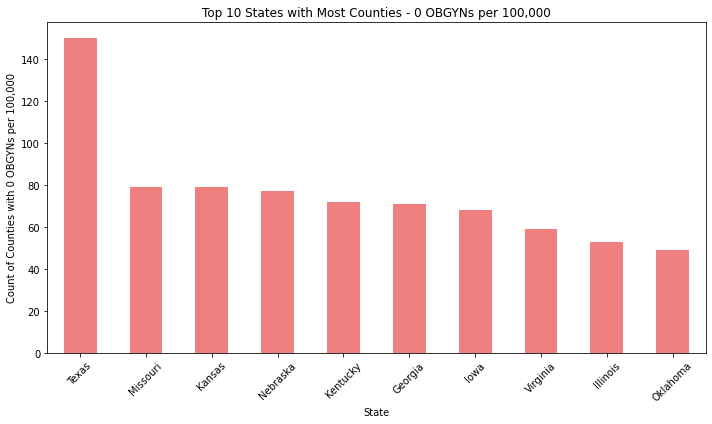

In [13]:

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_10_states_zeros.plot(kind='bar', color='lightcoral')
plt.title('Top 10 States with Most Counties - 0 OBGYNs per 100,000')
plt.xlabel('State')
plt.ylabel('Count of Counties with 0 OBGYNs per 100,000')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

These are the 10 states with the most counties considered maternity care deserts. Just by looking at them, they appear to be majority republican states. 

The next few cells dive deeper into some of these states, showing the breakdown for each county that is a maternal healthcare desert. This sets us up for bringing in county level election data.

The code filters the DataFrame zero_obgyn_counties to extract the rows where the 'state' column is 'Georgia'. This creates a new DataFrame (georgia_counties_zero_obgyn) containing information specifically about counties within Georgia that have zero OBGYNs per 100,000 population. This is done with a few states

In [14]:
# Counties in Georgia with 0 OBGYNs per 100,000
georgia_counties_zero_obgyn = zero_obgyn_counties[zero_obgyn_counties['state'] == 'Georgia']

print("Counties in Georgia with 0 OBGYNs per 100,000:")
georgia_counties_zero_obgyn

Counties in Georgia with 0 OBGYNs per 100,000:


,ID,county_fips_code,HRSA_region,state,county,obgyn_per100000,NCHS_UR_class,NCHS_UR_code,fips
387,388,13001,4,Georgia,Appling County,0.0,Non-core,6.0,13001
388,389,13003,4,Georgia,Atkinson County,0.0,Non-core,6.0,13003
390,391,13007,4,Georgia,Baker County,0.0,Small metro,4.0,13007
392,393,13011,4,Georgia,Banks County,0.0,Non-core,6.0,13011
396,397,13019,4,Georgia,Berrien County,0.0,Non-core,6.0,13019
...,...,...,...,...,...,...,...,...,...
539,540,13309,4,Georgia,Wheeler County,0.0,Non-core,6.0,13309
542,543,13315,4,Georgia,Wilcox County,0.0,Non-core,6.0,13315
543,544,13317,4,Georgia,Wilkes County,0.0,Non-core,6.0,13317
544,545,13319,4,Georgia,Wilkinson County,0.0,Non-core,6.0,13319


In [15]:
# Counties in Missouri with 0 OBGYNs per 100,000
missouri_counties_zero_obgyn = zero_obgyn_counties[zero_obgyn_counties['state'] == 'Missouri']

print("Counties in Missouri with 0 OBGYNs per 100,000:")
missouri_counties_zero_obgyn

Counties in Missouri with 0 OBGYNs per 100,000:


,ID,county_fips_code,HRSA_region,state,county,obgyn_per100000,NCHS_UR_class,NCHS_UR_code,fips
1483,1484,29001,7,Missouri,Adair County,0.0,Micropolitan,5.0,29001
1484,1485,29003,7,Missouri,Andrew County,0.0,Small metro,4.0,29003
1485,1486,29005,7,Missouri,Atchison County,0.0,Non-core,6.0,29005
1487,1488,29009,7,Missouri,Barry County,0.0,Non-core,6.0,29009
1488,1489,29011,7,Missouri,Barton County,0.0,Non-core,6.0,29011
...,...,...,...,...,...,...,...,...,...
1592,1593,29221,7,Missouri,Washington County,0.0,Non-core,6.0,29221
1593,1594,29223,7,Missouri,Wayne County,0.0,Non-core,6.0,29223
1594,1595,29225,7,Missouri,Webster County,0.0,Medium metro,3.0,29225
1595,1596,29227,7,Missouri,Worth County,0.0,Non-core,6.0,29227


In [16]:
# Counties in Kansas with 0 OBGYNs per 100,000
kansas_counties_zero_obgyn = zero_obgyn_counties[zero_obgyn_counties['state'] == 'Kansas']

print("Counties in Kansas with 0 OBGYNs per 100,000:")
kansas_counties_zero_obgyn

Counties in Kansas with 0 OBGYNs per 100,000:


,ID,county_fips_code,HRSA_region,state,county,obgyn_per100000,NCHS_UR_class,NCHS_UR_code,fips
888,889,20001,7,Kansas,Allen County,0.0,Non-core,6.0,20001
889,890,20003,7,Kansas,Anderson County,0.0,Non-core,6.0,20003
890,891,20005,7,Kansas,Atchison County,0.0,Micropolitan,5.0,20005
891,892,20007,7,Kansas,Barber County,0.0,Non-core,6.0,20007
893,894,20011,7,Kansas,Bourbon County,0.0,Non-core,6.0,20011
...,...,...,...,...,...,...,...,...,...
987,988,20199,7,Kansas,Wallace County,0.0,Non-core,6.0,20199
988,989,20201,7,Kansas,Washington County,0.0,Non-core,6.0,20201
989,990,20203,7,Kansas,Wichita County,0.0,Non-core,6.0,20203
990,991,20205,7,Kansas,Wilson County,0.0,Non-core,6.0,20205


In [17]:
# Counties in Texas with 0 OBGYNs per 100,000
texas_counties_zero_obgyn = zero_obgyn_counties[zero_obgyn_counties['state'] == 'Texas']

print("Counties in Texas with 0 OBGYNs per 100,000:")
texas_counties_zero_obgyn

Counties in Texas with 0 OBGYNs per 100,000:


,ID,county_fips_code,HRSA_region,state,county,obgyn_per100000,NCHS_UR_class,NCHS_UR_code,fips
2526,2527,48007,6,Texas,Aransas County,0.0,Medium metro,3.0,48007
2527,2528,48009,6,Texas,Archer County,0.0,Small metro,4.0,48009
2528,2529,48011,6,Texas,Armstrong County,0.0,Medium metro,3.0,48011
2530,2531,48015,6,Texas,Austin County,0.0,Large fringe metro,2.0,48015
2531,2532,48017,6,Texas,Bailey County,0.0,Non-core,6.0,48017
...,...,...,...,...,...,...,...,...,...
2770,2771,48495,6,Texas,Winkler County,0.0,Non-core,6.0,48495
2772,2773,48499,6,Texas,Wood County,0.0,Non-core,6.0,48499
2774,2775,48503,6,Texas,Young County,0.0,Non-core,6.0,48503
2775,2776,48505,6,Texas,Zapata County,0.0,Micropolitan,5.0,48505


In [18]:
# Counties in Nebraska with 0 OBGYNs per 100,000
nebraska_counties_zero_obgyn = zero_obgyn_counties[zero_obgyn_counties['state'] == 'Nebraska']

print("Counties in Nebraska with 0 OBGYNs per 100,000:")
nebraska_counties_zero_obgyn

Counties in Nebraska with 0 OBGYNs per 100,000:


,ID,county_fips_code,HRSA_region,state,county,obgyn_per100000,NCHS_UR_class,NCHS_UR_code,fips
1655,1656,31003,7,Nebraska,Antelope County,0.0,Non-core,6.0,31003
1656,1657,31005,7,Nebraska,Arthur County,0.0,Non-core,6.0,31005
1657,1658,31007,7,Nebraska,Banner County,0.0,Micropolitan,5.0,31007
1658,1659,31009,7,Nebraska,Blaine County,0.0,Non-core,6.0,31009
1659,1660,31011,7,Nebraska,Boone County,0.0,Non-core,6.0,31011
...,...,...,...,...,...,...,...,...,...
1741,1742,31175,7,Nebraska,Valley County,0.0,Non-core,6.0,31175
1743,1744,31179,7,Nebraska,Wayne County,0.0,Non-core,6.0,31179
1744,1745,31181,7,Nebraska,Webster County,0.0,Non-core,6.0,31181
1745,1746,31183,7,Nebraska,Wheeler County,0.0,Non-core,6.0,31183


In the next few code cells, we check the ob/gyn counts of specific counties. Bailey and Zapata counties are known to be predominantly Hispanic, so the code below checks if they are included in the list of counties with 0 ob/gyns per 100,000. This would indicate marginalized communities being affected by the maternal healthcare crisis

In [52]:
# Check if Bailey County in Texas has 0 OBGYNs per 100,000
bailey_county_tx = obgyn_df[
    (obgyn_df['state'] == 'Texas') & (obgyn_df['county'] == 'Bailey County')
]

if bailey_county_tx.empty:
    print("Bailey County in Texas is not found in the dataset.")
else:
    obgyn_rate_bailey_tx = bailey_county_tx.iloc[0]['obgyn_per100000']
    if obgyn_rate_bailey_tx == 0.0:
        print("Bailey County in Texas has 0 OBGYNs per 100,000.")
    else:
        print(f"Bailey County in Texas has {obgyn_rate_bailey_tx} OBGYNs per 100,000.")

Bailey County in Texas has 0 OBGYNs per 100,000.


In [53]:
# Check if Zapata County in Texas has 0 OBGYNs per 100,000
zapata_county_tx = obgyn_df[
    (obgyn_df['state'] == 'Texas') & (obgyn_df['county'] == 'Zapata County')
]

if zapata_county_tx.empty:
    print("Zapata County in Texas is not found in the dataset.")
else:
    obgyn_rate_zapata_tx = zapata_county_tx.iloc[0]['obgyn_per100000']
    if obgyn_rate_zapata_tx == 0.0:
        print("Zapata County in Texas has 0 OBGYNs per 100,000.")
    else:
        print(f"Zapata County in Texas has {obgyn_rate_zapata_tx} OBGYNs per 100,000.")

Zapata County in Texas has 0 OBGYNs per 100,000.


Both Bailey and Zapata county have 0 Ob/gyns per 100000, meaning they are considered maternity care deserts

In [61]:
# Check if Lancaster County in Nebraska has 0 Ob/Gyns per 100,000
lancaster_county_nebraska = obgyn_df[
    (obgyn_df['state'] == 'Nebraska') & (obgyn_df['county'] == 'Lancaster County')
]

if lancaster_county_nebraska.empty:
    print("Lancaster County in Nebraska is not found in the dataset.")
else:
    obgyn_rate_lancaster_nebraska = lancaster_county_nebraska.iloc[0]['obgyn_per100000']
    if obgyn_rate_lancaster_nebraska == 0.0:
        print("Lancaster County in Nebraska has 0 OBGYNs per 100,000.")
    else:
        print(f"Lancaster County in Nebraska has {obgyn_rate_lancaster_nebraska} OBGYNs per 100,000.")

Lancaster County in Nebraska has 20.7 OBGYNs per 100,000.


In the next section we aim to identify and display the top 10 states with the highest total number of Ob/Gyns per 100,000 residents. 

- First the code groups the Ob/Gyns data by state and calculates the total count of Ob/Gyns per 100,000 residents for each state
- Then states are sorted based on these totals in descending order
- Lastly, the code selects the top 10 states with the highest number of Ob/Gyns per 100,000 residents and prints out these states along with their corresponding counts

In [22]:
# Grouping by state and calculating the total number of OBGYNs per 100,000 for each state
state_obgyn_totals = obgyn_df.groupby('state')['obgyn_per100000'].sum().sort_values(ascending=False)

# Getting the top 10 states with the most amount of OBGYNs per 100,000
top_10_states_obgyn = state_obgyn_totals.head(10)

# Displaying the top 10 states and their OBGYN counts
print("Top 10 States with Most OBGYNs per 100,000:")
print(top_10_states_obgyn)

Top 10 States with Most OBGYNs per 100,000:
state
Virginia          1925.1
Georgia           1800.0
Texas             1760.5
North Carolina    1374.6
New York          1057.8
Puerto Rico       1045.6
Pennsylvania      1023.2
California        1022.8
Michigan          1016.1
Kentucky           956.9
Name: obgyn_per100000, dtype: float64


These states appear to be across different US regions, now including the West Coast and Northeast.

Below, we plot a bar graph of the top 10 states with the most Ob/Gyns per 100,000.

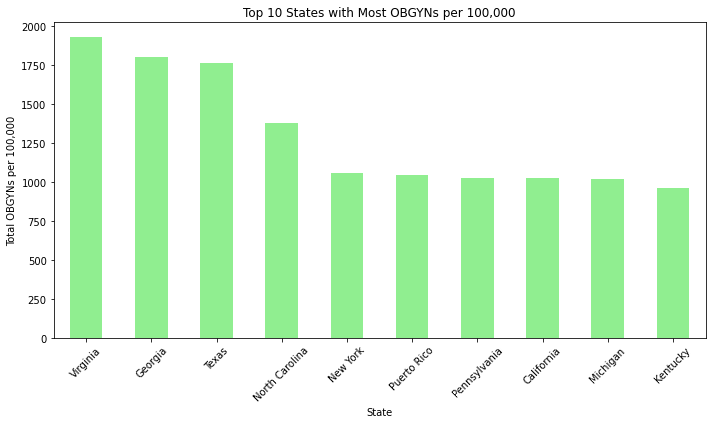

In [23]:
plt.figure(figsize=(10, 6))
top_10_states_obgyn.plot(kind='bar', color='lightgreen')
plt.title('Top 10 States with Most OBGYNs per 100,000')
plt.xlabel('State')
plt.ylabel('Total OBGYNs per 100,000')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Virginia, Georgia, Texas, and North Carolina have the most ob/gyns per 100,000. Interesting that Texas and Georgia appear on top ten for both highest number of maternal healthcare deserts and highest number of Ob/Gyns per 100,000.

### Bringing in Election Data

This section imports  MIT Election Data and Science Lab, 2018, "County Presidential Election Returns 2000-2020", processes and pivots the data to present candidate votes per county, organizing by party affiliation, and determines the winning party for each county based on maximum votes

We sourced the politcal data from the [MIT Election Data and Science Lab](https://electionlab.mit.edu/), more specifically, the "County Presidential Election Returns 2000-2020". We cleaned this data to focus on the 2020 election. The MIT Election Data and Science Lab has a reputation for providing comprehensive and reliable political data, serving as a reputable source for election-related information. The lab gathers and maintains a wide array of electoral data, including voting patterns, political affiliations, and election outcomes.

In [24]:
election_df = pd.read_csv('../data/raw/countypres_2000-2020.csv')

In [25]:
election_df.shape

(72617, 12)

In [26]:
election_df.columns

Index(['year', 'state', 'state_po', 'county_name', 'county_fips', 'office',
       'candidate', 'party', 'candidatevotes', 'totalvotes', 'version',
       'mode'],
      dtype='object')

## Looking into 2020 Election data

Here we are filtering the large dataset to focus on the 2020 election. This will enable us to have an up to date idea of political party affiliation.

In [27]:
year2020_filter = election_df['year']==2020

election_2020_df = election_df[year2020_filter]

In [28]:
election_2020_df.shape

(22093, 12)

In [29]:
election_2020_df

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
50524,2020,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,7503,27770,20220315,TOTAL
50525,2020,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,OTHER,OTHER,429,27770,20220315,TOTAL
50526,2020,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,19838,27770,20220315,TOTAL
50527,2020,ALABAMA,AL,BALDWIN,1003.0,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,24578,109679,20220315,TOTAL
50528,2020,ALABAMA,AL,BALDWIN,1003.0,US PRESIDENT,OTHER,OTHER,1557,109679,20220315,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...
72612,2020,WYOMING,WY,WASHAKIE,56043.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,3245,4032,20220315,TOTAL
72613,2020,WYOMING,WY,WESTON,56045.0,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,360,3560,20220315,TOTAL
72614,2020,WYOMING,WY,WESTON,56045.0,US PRESIDENT,JO JORGENSEN,LIBERTARIAN,46,3560,20220315,TOTAL
72615,2020,WYOMING,WY,WESTON,56045.0,US PRESIDENT,OTHER,OTHER,47,3560,20220315,TOTAL


The following code below takes the original DataFrame election_2020_df and creates a pivot table where the index consists of unique combinations of 'county_fips' and 'totalvotes', the columns represent different political parties, and the values in the table are the corresponding 'candidatevotes' for each party in the respective counties and total votes. This operation essentially reshapes the data, making it easier to analyze and compare candidate votes across different counties and parties in the 2020 election.

In [30]:
election_2020_df.pivot_table(index=['county_fips', 'totalvotes'],
                       columns = 'party',
                       values = 'candidatevotes')
                    

,party,DEMOCRAT,GREEN,LIBERTARIAN,OTHER,REPUBLICAN
county_fips,totalvotes,,,,,
1001.0,27770,7503.0,NaN,NaN,429.0,19838.0
1003.0,109679,24578.0,NaN,NaN,1557.0,83544.0
1005.0,10518,4816.0,NaN,NaN,80.0,5622.0
1007.0,9595,1986.0,NaN,NaN,84.0,7525.0
1009.0,27588,2640.0,NaN,NaN,237.0,24711.0
...,...,...,...,...,...,...
56037.0,16698,3823.0,NaN,350.0,296.0,12229.0
56039.0,14787,9848.0,NaN,255.0,343.0,4341.0
56041.0,9459,1591.0,NaN,172.0,200.0,7496.0


If there were any missing values (which there are, represented by NaN) for certain combinations of county, state, and party, they will be replaced with zeros in this new pivot table below.

In [60]:
election_new = election_2020_df.pivot_table(index=['county_fips', 'state', 'county_name'], columns='party', values='candidatevotes', fill_value=0)

election_new

,,party,DEMOCRAT,GREEN,LIBERTARIAN,OTHER,REPUBLICAN
county_fips,state,county_name,,,,,
1001.0,ALABAMA,AUTAUGA,7503.0,0.0,0.0,429.0,19838.0
1003.0,ALABAMA,BALDWIN,24578.0,0.0,0.0,1557.0,83544.0
1005.0,ALABAMA,BARBOUR,4816.0,0.0,0.0,80.0,5622.0
1007.0,ALABAMA,BIBB,1986.0,0.0,0.0,84.0,7525.0
1009.0,ALABAMA,BLOUNT,2640.0,0.0,0.0,237.0,24711.0
...,...,...,...,...,...,...,...
56037.0,WYOMING,SWEETWATER,3823.0,0.0,350.0,296.0,12229.0
56039.0,WYOMING,TETON,9848.0,0.0,255.0,343.0,4341.0
56041.0,WYOMING,UINTA,1591.0,0.0,172.0,200.0,7496.0


#### Determine the winning party in each county

The following code calculates the winning party in each county by analysing the vote counts. The DataFrame election_new will have a new column called 'winner', indicating the winning party (among the listed parties) for each county based on the votes received.

In [32]:
# Get the party with the maximum votes for each row (county)
election_new['winner'] = election_new[['DEMOCRAT', 'GREEN', 'LIBERTARIAN', 'OTHER', 'REPUBLICAN']].idxmax(axis=1)

election_new

,,party,DEMOCRAT,GREEN,LIBERTARIAN,OTHER,REPUBLICAN,winner
county_fips,state,county_name,,,,,,
1001.0,ALABAMA,AUTAUGA,7503.0,0.0,0.0,429.0,19838.0,REPUBLICAN
1003.0,ALABAMA,BALDWIN,24578.0,0.0,0.0,1557.0,83544.0,REPUBLICAN
1005.0,ALABAMA,BARBOUR,4816.0,0.0,0.0,80.0,5622.0,REPUBLICAN
1007.0,ALABAMA,BIBB,1986.0,0.0,0.0,84.0,7525.0,REPUBLICAN
1009.0,ALABAMA,BLOUNT,2640.0,0.0,0.0,237.0,24711.0,REPUBLICAN
...,...,...,...,...,...,...,...,...
56037.0,WYOMING,SWEETWATER,3823.0,0.0,350.0,296.0,12229.0,REPUBLICAN
56039.0,WYOMING,TETON,9848.0,0.0,255.0,343.0,4341.0,DEMOCRAT
56041.0,WYOMING,UINTA,1591.0,0.0,172.0,200.0,7496.0,REPUBLICAN


Below we are reviewing what is stored as column names to ensure this dataset can be matched with obgyn dataset.

In [33]:
election_new.columns

Index(['DEMOCRAT', 'GREEN', 'LIBERTARIAN', 'OTHER', 'REPUBLICAN', 'winner'], dtype='object', name='party')

Below we are changing the column names of "state" and "county_name" to match the column names in the obgyn datasets so that they can be merged

In [34]:
# Reset the index to access index levels separately
election_new.reset_index(inplace=True)

# Update 'state' and 'county_name' in the DataFrame
election_new['state'] = election_new['state'].str.title()
election_new['county_name'] = election_new['county_name'].str.replace(' County$', '', regex=True).str.title() + " County"

# Set the index back to the modified 'state' and 'county_name' columns
election_new.set_index(['county_fips', 'state', 'county_name'], inplace=True)


election_new

,,party,DEMOCRAT,GREEN,LIBERTARIAN,OTHER,REPUBLICAN,winner
county_fips,state,county_name,,,,,,
1001.0,Alabama,Autauga County,7503.0,0.0,0.0,429.0,19838.0,REPUBLICAN
1003.0,Alabama,Baldwin County,24578.0,0.0,0.0,1557.0,83544.0,REPUBLICAN
1005.0,Alabama,Barbour County,4816.0,0.0,0.0,80.0,5622.0,REPUBLICAN
1007.0,Alabama,Bibb County,1986.0,0.0,0.0,84.0,7525.0,REPUBLICAN
1009.0,Alabama,Blount County,2640.0,0.0,0.0,237.0,24711.0,REPUBLICAN
...,...,...,...,...,...,...,...,...
56037.0,Wyoming,Sweetwater County,3823.0,0.0,350.0,296.0,12229.0,REPUBLICAN
56039.0,Wyoming,Teton County,9848.0,0.0,255.0,343.0,4341.0,DEMOCRAT
56041.0,Wyoming,Uinta County,1591.0,0.0,172.0,200.0,7496.0,REPUBLICAN


In [35]:
georgia_counties_zero_obgyn.columns

Index(['ID', 'county_fips_code', 'HRSA_region', 'state', 'county',
       'obgyn_per100000', 'NCHS_UR_class', 'NCHS_UR_code', 'fips'],
      dtype='object')

In [36]:
election_new.columns

Index(['DEMOCRAT', 'GREEN', 'LIBERTARIAN', 'OTHER', 'REPUBLICAN', 'winner'], dtype='object', name='party')

In [37]:
# Reset the index to access index levels separately
election_new.reset_index(inplace=True)
# Rename the 'county_name' column in election_new to 'county'
election_new = election_new.rename(columns={'county_name': 'county'})

election_new

party,county_fips,state,county,DEMOCRAT,GREEN,LIBERTARIAN,OTHER,REPUBLICAN,winner
0,1001.0,Alabama,Autauga County,7503.0,0.0,0.0,429.0,19838.0,REPUBLICAN
1,1003.0,Alabama,Baldwin County,24578.0,0.0,0.0,1557.0,83544.0,REPUBLICAN
2,1005.0,Alabama,Barbour County,4816.0,0.0,0.0,80.0,5622.0,REPUBLICAN
3,1007.0,Alabama,Bibb County,1986.0,0.0,0.0,84.0,7525.0,REPUBLICAN
4,1009.0,Alabama,Blount County,2640.0,0.0,0.0,237.0,24711.0,REPUBLICAN
...,...,...,...,...,...,...,...,...,...
3148,56037.0,Wyoming,Sweetwater County,3823.0,0.0,350.0,296.0,12229.0,REPUBLICAN
3149,56039.0,Wyoming,Teton County,9848.0,0.0,255.0,343.0,4341.0,DEMOCRAT
3150,56041.0,Wyoming,Uinta County,1591.0,0.0,172.0,200.0,7496.0,REPUBLICAN
3151,56043.0,Wyoming,Washakie County,651.0,0.0,65.0,71.0,3245.0,REPUBLICAN


The next few cells merge the election results data (specifically the 'winner' column) with the counties that are maternal healthcare deserts, determining their political party affiliation. This is done with a merge operation and filtering columns.

**Merge Operation:**

merged_data_georgia = georgia_counties_zero_obgyn.merge(election_new, on=['state', 'county'], how='left')
- This merges our two datasets, georgia_counties_zero_obgyn and election_new, based on the columns 'state' and 'county', using a left join (how='left'). The resulting DataFrame (merged_data_georgia) will contain the combined information from both datasets where the 'state' and 'county' values match. The 'election_new' data will be appended to the 'georgia_counties_zero_obgyn' data where available.

**Column Filtering:**

filtered_data_georgia = merged_data_georgia[['state', 'county', 'winner']].drop_duplicates() 
- From the merged data (merged_data_georgia), this line selects specific columns ('state', 'county', 'winner'). Then, it uses drop_duplicates() to remove any duplicate rows based on these selected columns, ensuring that each unique combination of 'state' and 'county' appears only once in the resulting DataFrame (filtered_data_georgia).

In [38]:
# Merge election data with Georgia counties having 0 OBGYNs per 100,000
merged_data_georgia = georgia_counties_zero_obgyn.merge(election_new, on=['state', 'county'], how='left')

# Filter merged data to display only necessary columns
filtered_data_georgia = merged_data_georgia[['state', 'county', 'winner']].drop_duplicates()

filtered_data_georgia

,state,county,winner
0,Georgia,Appling County,REPUBLICAN
1,Georgia,Atkinson County,REPUBLICAN
2,Georgia,Baker County,REPUBLICAN
3,Georgia,Banks County,REPUBLICAN
4,Georgia,Berrien County,REPUBLICAN
...,...,...,...
66,Georgia,Wheeler County,REPUBLICAN
67,Georgia,Wilcox County,REPUBLICAN
68,Georgia,Wilkes County,REPUBLICAN
69,Georgia,Wilkinson County,REPUBLICAN


The final output (filtered_data_georgia) contains the 'state', 'county', and 'winner' columns, showing a unique list of counties in Georgia that had zero OBGYNs per 100,000 population along with the corresponding winning party in each county as per the election data.

This process is repeated below for Missouri, Kansas, and Nebraska.

In [42]:
# Merge election data with Missouri counties having 0 OBGYNs per 100,000
merged_data_missouri = missouri_counties_zero_obgyn.merge(election_new, on=['state', 'county'], how='left')

# Filter merged data to display only necessary columns
filtered_data_missouri = merged_data_missouri[['state', 'county', 'winner']].drop_duplicates()

filtered_data_missouri

,state,county,winner
0,Missouri,Adair County,REPUBLICAN
1,Missouri,Andrew County,REPUBLICAN
2,Missouri,Atchison County,REPUBLICAN
3,Missouri,Barry County,REPUBLICAN
4,Missouri,Barton County,REPUBLICAN
...,...,...,...
74,Missouri,Washington County,REPUBLICAN
75,Missouri,Wayne County,REPUBLICAN
76,Missouri,Webster County,REPUBLICAN
77,Missouri,Worth County,REPUBLICAN


Looks like republican dominates

In [44]:
# Merge election data with Kansas counties having 0 OBGYNs per 100,000
merged_data_kansas = kansas_counties_zero_obgyn.merge(election_new, on=['state', 'county'], how='left')

# Filter merged data to display only necessary columns
filtered_data_kansas = merged_data_kansas[['state', 'county', 'winner']].drop_duplicates()

filtered_data_kansas

,state,county,winner
0,Kansas,Allen County,REPUBLICAN
1,Kansas,Anderson County,REPUBLICAN
2,Kansas,Atchison County,REPUBLICAN
3,Kansas,Barber County,REPUBLICAN
4,Kansas,Bourbon County,REPUBLICAN
...,...,...,...
74,Kansas,Wallace County,REPUBLICAN
75,Kansas,Washington County,REPUBLICAN
76,Kansas,Wichita County,REPUBLICAN
77,Kansas,Wilson County,REPUBLICAN


Looks like republican dominates

In [55]:
# Merge election data with Nebraska counties having 0 OBGYNs per 100,000
merged_data_nebraska = nebraska_counties_zero_obgyn.merge(election_new, on=['state', 'county'], how='left')

# Filter merged data to display only necessary columns
filtered_data_nebraska = merged_data_nebraska[['state', 'county', 'winner']].drop_duplicates()

filtered_data_nebraska

,state,county,winner
0,Nebraska,Antelope County,REPUBLICAN
1,Nebraska,Arthur County,REPUBLICAN
2,Nebraska,Banner County,REPUBLICAN
3,Nebraska,Blaine County,REPUBLICAN
4,Nebraska,Boone County,REPUBLICAN
...,...,...,...
72,Nebraska,Valley County,REPUBLICAN
73,Nebraska,Wayne County,REPUBLICAN
74,Nebraska,Webster County,REPUBLICAN
75,Nebraska,Wheeler County,REPUBLICAN


The code below generates a pie chart that visually represents the distribution of political party wins ('REPUBLICAN' vs. 'DEMOCRAT') among Georgia counties identified as maternal healthcare deserts, showcasing the percentage of counties that voted for each party in the 2020 elections.

This process is repeated below for Missouri, Kansas, and Nebraska.

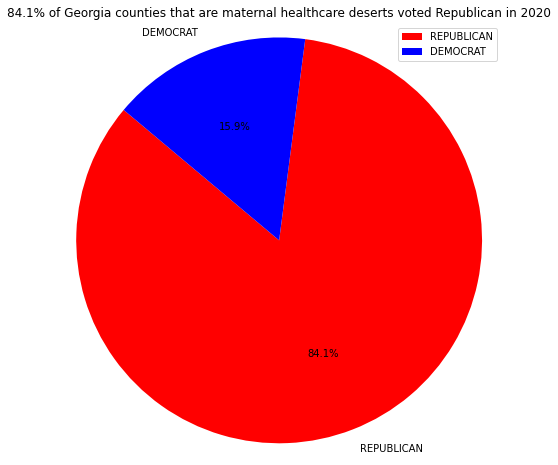

In [49]:
import matplotlib.pyplot as plt

# Calculate counts of each 'winner'
party_counts = filtered_data_georgia['winner'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
colors = ['red', 'blue']  # Blue for DEMOCRAT, Red for REPUBLICAN
plt.pie(party_counts, labels=party_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('84.1% of Georgia counties that are maternal healthcare deserts voted Republican in 2020')
plt.legend()
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

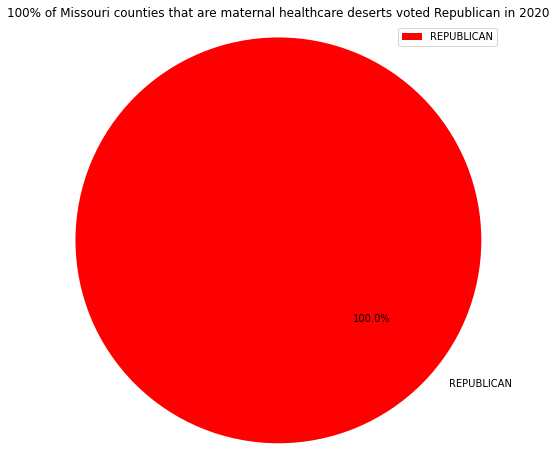

In [57]:
# Calculate counts of each 'winner'
party_counts = filtered_data_missouri['winner'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
colors = ['red', 'blue']  # Blue for DEMOCRAT, Red for REPUBLICAN
plt.pie(party_counts, labels=party_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('100% of Missouri counties that are maternal healthcare deserts voted Republican in 2020')
plt.legend()
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

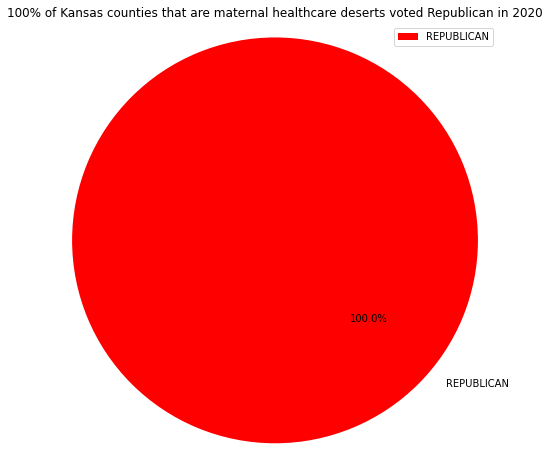

In [58]:
# Calculate counts of each 'winner'
party_counts = filtered_data_kansas['winner'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
colors = ['red', 'blue']  # Blue for DEMOCRAT, Red for REPUBLICAN
plt.pie(party_counts, labels=party_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('100% of Kansas counties that are maternal healthcare deserts voted Republican in 2020')
plt.legend()
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

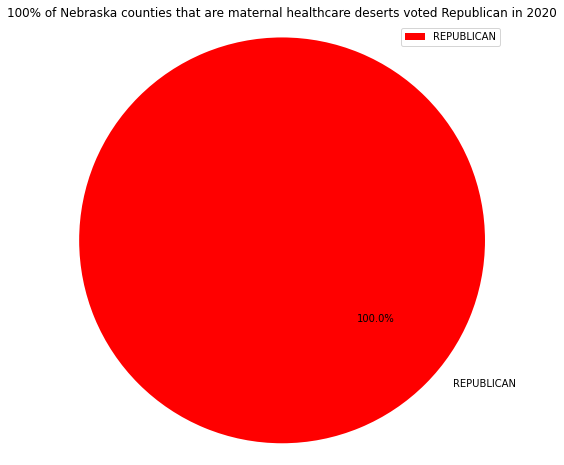

In [59]:
# Calculate counts of each 'winner'
party_counts = filtered_data_nebraska['winner'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
colors = ['red', 'blue']  # Blue for DEMOCRAT, Red for REPUBLICAN
plt.pie(party_counts, labels=party_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('100% of Nebraska counties that are maternal healthcare deserts voted Republican in 2020')
plt.legend()
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

The pie charts above show the distribution of votes for counties considered maternal care deserts in the respective states. 100% of the counties that are maternal healthcare deserts in Missouri, Kansas, and Nebraska voted Republican in the 2020 election. In Georgia, 84% of the maternal healthcare desert counties voted Republican, which is still a majority considering Democrats won overall in the swing state of Georgia

### Election data with state dataset..

Coming from MIT datalab, We were going to investigate state level election results, but decided county level would allow for a more in depth analysis

#### Load & Inspect Data

In [40]:
election_state = pd.read_csv('../data/raw/1976-2020-president.csv')

In [41]:
election_state.shape

(4287, 15)

In [42]:
election_state.columns

Index(['year', 'state', 'state_po', 'state_fips', 'state_cen', 'state_ic',
       'office', 'candidate', 'party_detailed', 'writein', 'candidatevotes',
       'totalvotes', 'version', 'notes', 'party_simplified'],
      dtype='object')

In [43]:
year2020 = election_state['year']==2020

election_2020 = election_state[year2020]